In [1]:
import random as ran
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math

In [2]:
h=1
tmax=100
tpoints=np.arange(0,tmax+1,h)

sample=10000
s_points=np.arange(0,sample+1,h)

In [3]:
first=1
p_same=2/3
p_change=1/3

In [4]:
ele=first
pos=first
position=[]

In [5]:
up=2
down=-2
right=1
left=-1

In [6]:
# loop for capture possibility
for i in s_points:
    position.append(pos)
    ele = 1
    # 2nd move        
    if ran.random() > p_change:
        ele += right
        test = right
    else:
        if ran.random() > 1/2:
            ele += 0*up
            test = up
        else:
            ele += 0*down
            test = down
    # 3rd move  
    if test == right:
        if ran.random() > p_change:
            ele += right
            test = right
        else:
            if ran.random() > 1/2:
                ele += 0*up
                test = up
            else:
                ele += 0*down
                test = down
    else:
        if test == up:
            if ran.random() > p_change:
                ele += 0*up
                test = up
            else:
                if ran.random() > 1/2:
                    ele += left
                    test = left
                else:
                    ele += right
                    test = right
        else:
            if test == down:
                if ran.random() > p_change:
                    ele += 0*down
                    test = down
                else:
                    if ran.random() > 1/2:
                        ele += left
                        test = left
                    else:
                        ele += right
                        test = right
        # 4th and later move
        for t in range(3,tmax+1):
            if test == right:
                if ran.random() > p_change:
                    ele += right
                    test = right
                else:
                    if ran.random() > 1/2:
                        ele += 0*up
                        test = up
                    else:
                        ele += 0*down
                        test = down
            else:
                if test == up:
                    if ran.random() > p_change:
                        ele += 0*up
                        test = up
                    else:
                        if ran.random() > 1/2:
                            ele += left
                            test = left
                        else:
                            ele += right
                            test = right
                else:
                    if test == down:
                        if ran.random() > p_change:
                            ele += 0*down
                            test = down
                        else:
                            if ran.random() > 1/2:
                                ele += left
                                test = left
                            else:
                                ele += right
                                test = right
                    else:
                        if test == left:
                            if ran.random() > p_change:
                                ele += left
                                test = left
                            else:
                                if ran.random() > 1/2:
                                    ele += 0*up
                                    test = up
                                else:
                                    ele += 0*down
                                    test = down
    pos = ele


In [7]:
print(position)

[1, 3, 3, 3, 16, 2, 3, 3, 3, 12, 3, 3, 3, 2, 3, 3, 2, 15, 2, 3, 2, 4, 2, -14, 2, 2, 2, 3, 2, 3, 3, 3, 2, 14, 7, 22, 2, 3, 3, 3, -28, 3, 2, 3, 3, 14, -5, 2, 2, -13, -5, 3, -19, 3, 9, 3, 6, 12, 3, 3, 2, 3, 3, 2, -7, -14, 3, 7, 3, 2, 3, 2, 6, 3, 9, 3, 2, 3, 3, 2, 5, 3, 2, 2, 11, -6, 3, 3, 2, 3, 22, 3, 3, 25, 2, 25, 3, 2, 3, 27, 3, 2, 3, 3, 14, 2, 3, 17, 3, 2, 3, 3, 2, 2, 3, 31, 3, 33, 3, 3, 3, 3, 3, 3, 2, -34, 3, -12, -15, 2, -2, 3, 2, 3, 12, 2, 7, 3, 3, 3, -12, -4, 3, 1, 16, 3, 23, 3, 2, 12, 3, -3, 3, 3, 3, -4, 2, 13, 3, 3, 2, 3, 3, -9, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, -10, 3, 3, 3, 3, 5, 8, 3, 2, 2, 3, 3, -20, 2, 3, 2, -27, 3, 3, 4, 3, -13, 3, 3, 2, 15, -4, 2, 3, 3, -25, 3, 2, 3, 2, -14, 2, 3, -2, 3, 2, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, -20, 2, 2, 2, 3, 2, 2, 2, 16, 3, 2, 3, 36, 2, 3, 3, 3, 2, 3, 3, 10, 3, 15, 25, 2, 2, 11, 2, -5, 2, 3, 3, 3, 3, 8, -28, 2, 2, 3, 3, 2, 2, 2, -14, 4, 3, 31, 2, -6, 2, 10, 3, 3, 2, 2, 3, -6, 2, 11, 3, 2, 24, -22, 2, 4, 3, 17, 5, 3, 3, 2, -1, 3, 3, 3, 3, 2

In [8]:
position=position[1:sample+1]
print(len(position))

10000


In [9]:
reactor=[]
capture=[]
through=[]

num_r=0
num_c=0
num_t=0

size=np.arange(0,tmax+1,h)
print(len(size))

101


In [10]:
for j in range(tmax+1):
    reactor.append(num_r)
    capture.append(num_c)
    through.append(num_t)
    x = size[j]
    nt=0
    nc=0
    nr=0
    for i in range(sample):
        if position[i] > x:
            nt += 1
        elif position[i] > 0:
            nc += 1
        else:
            nr += 1
    if nr == 0:
        num_r = 0.001
    else:
        num_r = nr
    if nc == 0:
        num_c = 0.001
    else:
        num_c = nc
    if nt == 0:
        num_t = 0.001
    else:
        num_t = nt

In [11]:
reactor_n=reactor[1:tmax+1]
capture_n=capture[1:tmax+1]
through_n=through[1:tmax+1]

In [12]:
print(reactor_n)
print(len(reactor_n))

[1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640, 1640]
100


In [13]:
print(capture_n)
print(len(capture_n))

[0.001, 94, 2449, 6957, 7039, 7118, 7190, 7260, 7322, 7397, 7467, 7541, 7598, 7654, 7711, 7767, 7834, 7889, 7947, 8003, 8045, 8082, 8104, 8134, 8164, 8185, 8206, 8230, 8249, 8267, 8289, 8301, 8312, 8320, 8329, 8336, 8339, 8341, 8346, 8349, 8349, 8349, 8352, 8355, 8356, 8357, 8358, 8359, 8359, 8359, 8359, 8359, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360, 8360]
100


In [14]:
print(through_n)
print(len(through_n))

[8360, 8266, 5911, 1403, 1321, 1242, 1170, 1100, 1038, 963, 893, 819, 762, 706, 649, 593, 526, 471, 413, 357, 315, 278, 256, 226, 196, 175, 154, 130, 111, 93, 71, 59, 48, 40, 31, 24, 21, 19, 14, 11, 11, 11, 8, 5, 4, 3, 2, 1, 1, 1, 1, 1, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
100


In [15]:
size=size[1:tmax+1]
print(size)
print(len(size))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
100


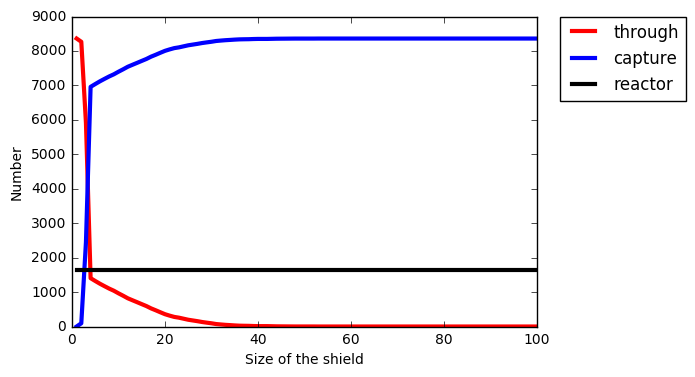

In [16]:
size_array=np.array(size)
through_array=np.array(through_n)
capture_array=np.array(capture_n)
reactor_array=np.array(reactor_n)
plt.plot(size_array,through_array,'-',label='through',color='red',linewidth=3.0)
plt.plot(size_array,capture_array,'-',label='capture',color='blue',linewidth=3.0)
plt.plot(size_array,reactor_array,'-',label='reactor',color='black',linewidth=3.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Size of the shield')
plt.ylabel('Number')
plt.show()





In [17]:
P_through=through_array/sample
P_capture=capture_array/sample
P_reactor=reactor_array/sample

In [18]:
m_through,b_through=np.polyfit(size,np.log(P_through),1)
print(m_through,b_through)


fit_t=m_through*size+b_through
uncertainty_t=(1/tmax)*np.sum((fit_t-np.log(P_through))**2)#Standard Deviation
print(math.sqrt(uncertainty_t))

-0.194753479689 -0.319090060465
2.1133523006851744


In [19]:
m_capture,b_capture=np.polyfit(size,np.log(P_capture),1)
print(m_capture,b_capture)


fit_c=m_capture*size+b_capture
uncertainty_c=(1/tmax)*np.sum((fit_t-np.log(P_capture))**2)#Standard Deviation
print(math.sqrt(uncertainty_c))

0.0137528010763 -1.1113468821
11.557936303245231


In [20]:
m_reactor,b_reactor=np.polyfit(size,np.log(P_reactor),1)
print(m_reactor,b_reactor)


fit_t=m_reactor*size+b_reactor
uncertainty_r=(1/tmax)*np.sum((fit_t-np.log(P_reactor))**2)#Standard Deviation
print(math.sqrt(uncertainty_r))

6.10769185202e-18 -1.80788885116
3.648565166692871e-16
